## Exploitation des données météorologiques issues des stations MétéoFrance

In [1]:
#importation des librairies
!pip install pandas
import pandas as pd

In [9]:
#importation des données
D = pd.read_csv("PontMathurin.csv",sep=";")
D

POSTE      DATE   RR QRR    TM QTM    UM  QUM  GLOT QGLOT
0     97404540  20110101  0,0   v  26,9   v   NaN  NaN  2851     v
1     97404540  20110102  0,0   v  26,9   v   NaN  NaN  2951     v
2     97404540  20110103  0,0   v  27,1   v   NaN  NaN  2918     v
3     97404540  20110104  0,0   v  26,9   v   NaN  NaN  3008     v
4     97404540  20110105  0,0   v  26,7   v   NaN  NaN  2902     v
...        ...       ...  ...  ..   ...  ..   ...  ...   ...   ...
3648  97404540  20201227  0,0   v  28,3   v  72.0    v  2070     t
3649  97404540  20201228  0,0   v  27,8   v  70.0    v  1870     t
3650  97404540  20201229  0,0   v  27,8   v  63.0    v  3032     t
3651  97404540  20201230  0,0   v  27,0   v  65.0    v  3086     t
3652  97404540  20201231  0,0   v  27,1   v  70.0    v  2831     t

[3653 rows x 10 columns]

On va par exemple étudier le rayonnement global, qui est noté dans le fichier sous la colonne RR

In [10]:
ray = D["GLOT"]

In [11]:
date = pd.DatetimeIndex(pd.to_datetime(D["DATE"],format="%Y%m%d")) #conversion en date des données date et mise au format format
ray.index = date

In [12]:
ray

DATE
2011-01-01    2851
2011-01-02    2951
2011-01-03    2918
2011-01-04    3008
2011-01-05    2902
              ... 
2020-12-27    2070
2020-12-28    1870
2020-12-29    3032
2020-12-30    3086
2020-12-31    2831
Name: GLOT, Length: 3653, dtype: int64

On a ainsi une série temporelle du rayonnement global de chaque jour.

On veut ensuite créer une année type.
Pour cela , on moyenne tous les mois.


In [13]:
ray = ray[~((ray.index.month == 2) & (ray.index.day == 29))] #on supprime tous les 29 févriers
ray

DATE
2011-01-01    2851
2011-01-02    2951
2011-01-03    2918
2011-01-04    3008
2011-01-05    2902
              ... 
2020-12-27    2070
2020-12-28    1870
2020-12-29    3032
2020-12-30    3086
2020-12-31    2831
Name: GLOT, Length: 3650, dtype: int64

In [14]:
p = ray.resample("m").mean()
#p = p[~((p.index.month == 2) & (p.index.day == 29))] #pour éviter des problèmes plus loin, on supprime tous les données des 29 février
#en fait non, pas nécessaire
p

DATE
2011-01-31    2379.387097
2011-02-28    1962.321429
2011-03-31    1850.516129
2011-04-30    1447.033333
2011-05-31    1414.225806
                 ...     
2020-08-31    1481.806452
2020-09-30    1615.366667
2020-10-31    2186.354839
2020-11-30    1984.166667
2020-12-31    2341.483871
Freq: M, Name: GLOT, Length: 120, dtype: float64

<AxesSubplot:xlabel='DATE'>

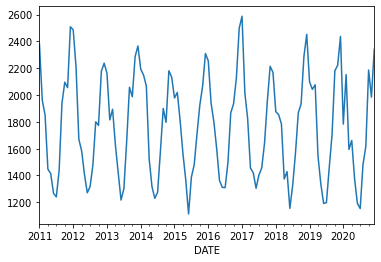

In [15]:
p.plot()

<AxesSubplot:xlabel='DATE'>

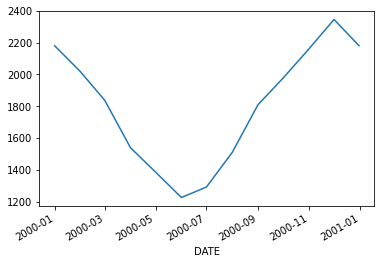

In [17]:
typ = p.groupby([p.index.month]).mean() #typ est l'année type (moyenne de tous les janviers, etc)
typ.index = pd.to_datetime('2000-' + typ.index.astype(int).astype(str) + '-1', format = '%Y-%m') #on se place arbitrairement à l'année 2000


#On ajoute un 31 décembre égal au premier janvier, pour avoir une année complète
typ["2000-12-31"] = typ["2000-01-01"]
typ.index = pd.to_datetime(typ.index)
typ.plot()

<AxesSubplot:xlabel='DATE'>

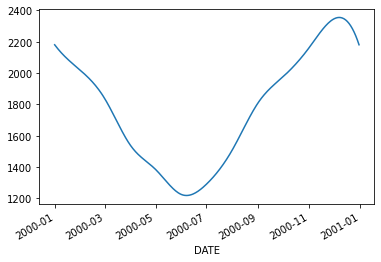

In [18]:
#On interpole ensuite cette série pour avoir une donnée par jour, grâce à une interpolation.
an = typ.resample("D").interpolate(method="cubic")
an = an[~((an.index.month == 2) & (an.index.day == 29))]
an.plot()

On a désormais une belle donnée exploitable pour la suite.

On exporte ensuite le fichier final pour pouvoir l'exploiter dans d'autres codes

In [19]:
an.to_csv(r'C:\Users\nicol\OneDrive\Bureau\JUPYTER\Donnees\Traitees\MareVieillePlace_GLOT.csv')

In [20]:
an

DATE
2000-01-01    2180.000000
2000-01-02    2172.964408
2000-01-03    2166.117587
2000-01-04    2159.452085
2000-01-05    2152.960449
                 ...     
2000-12-27    2237.886812
2000-12-28    2224.665633
2000-12-29    2210.621479
2000-12-30    2195.738289
2000-12-31    2180.000000
Name: GLOT, Length: 365, dtype: float64